[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Mura_Clahe.ipynb)

<img height="60px" src="https://colab.research.google.com/img/colab_favicon.ico" align="left" hspace="20px" vspace="5px">

## Welcome to Colaboratory!

Colaboratory is a free Jupyter notebook environment that requires no setup and runs entirely in the cloud. See our [FAQ](https://research.google.com/colaboratory/faq.html) for more info.

## Getting Started
- [Overview of Colaboratory](/notebooks/basic_features_overview.ipynb)
- [Loading and saving data: Local files, Drive, Sheets, Google Cloud Storage](/notebooks/io.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Using Google Cloud BigQuery](/notebooks/bigquery.ipynb)
- [Forms](/notebooks/forms.ipynb), [Charts](/notebooks/charts.ipynb), [Markdown](/notebooks/markdown_guide.ipynb), & [Widgets](/notebooks/widgets.ipynb)
- [TensorFlow with GPU](/notebooks/gpu.ipynb)
- [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/): [Intro to Pandas](/notebooks/mlcc/intro_to_pandas.ipynb) & [First Steps with TensorFlow](/notebooks/mlcc/first_steps_with_tensor_flow.ipynb)


## Highlighted Features
### Seedbank

Looking for Colab notebooks to learn from? Check out [Seedbank](https://tools.google.com/seedbank/), a place to discover interactive machine learning examples.

### TensorFlow execution

Colaboratory allows you to execute TensorFlow code in your browser with a single click. The example below adds two matrices.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [2]:
!wget https://fs6.transfernow.net/download/5b6149f282693/master/MURA-v1.1.zip

--2018-08-02 07:25:37--  https://fs6.transfernow.net/download/5b6149f282693/master/MURA-v1.1.zip
Resolving fs6.transfernow.net (fs6.transfernow.net)... 163.172.20.194
Connecting to fs6.transfernow.net (fs6.transfernow.net)|163.172.20.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383652532 (366M) [application/zip]
Saving to: ‘MURA-v1.1.zip’

MURA-v1.1.zip        51%[=========>          ] 189.31M  2.44MB/s    eta 45s    

MURA-v1.1.zip       100%[===================>] 365.88M  4.71MB/s    in 90s     

2018-08-02 07:27:07 (4.09 MB/s) - ‘MURA-v1.1.zip’ saved [383652532/383652532]



In [3]:
!pip uninstall Pillow -y

!pip install Pillow

Uninstalling Pillow-4.0.0:
  Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 2.0MB 10.3MB/s 


In [3]:
import PIL
print(PIL.PILLOW_VERSION)
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

from torch.utils.data import DataLoader, Dataset
from torchvision.datasets.folder import pil_loader
from torchvision import transforms, utils
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, transform
import matplotlib.pyplot as plt
import os
from torchvision import  models
import torch.nn as nn
import torch.optim as optim
import copy
from torch.optim import lr_scheduler
import time
import datetime as dt
from PIL import Image
import cv2

5.2.0
0.4.0
True


In [0]:
%%capture
!unzip MURA-v1.1.zip


In [3]:
!ls

datalab  __MACOSX  MURA-v1.1  MURA-v1.1.zip


In [0]:
train_path_df = pd.read_csv('MURA-v1.1/train/train_XR_FINGER.csv')
valid_path_df = pd.read_csv('MURA-v1.1/valid/valid_XR_FINGER.csv')

In [0]:
image_list = train_path_df.iloc[1000:1015,0]
im_path = image_list.iloc[2]

In [27]:
im_path

'MURA-v1.1/train/XR_FINGER/patient03512/study1_positive/image2.png'

In [0]:
im = cv2.imread(im_path)

In [0]:
def channel_check(im):
  channel0 = im[:,:,0]
  channel1 = im[:,:,1]
  channel2 = im[:,:,2]
  diff = channel0 - channel1
  print(channel0.sum(),channel1.sum(),channel2.sum())
  print(diff.sum())

In [30]:
diff = channel0 - channel1
print(channel0.sum(),channel1.sum(),channel2.sum())
print(diff.sum())

5557954 5557954 5557954
0


In [0]:
def refix(image_path) :
  desired_size = 512
  im_pth = image_path
  #img = cv2.imread(image_path,0)
  # create a CLAHE object (Arguments are optional).
  #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  #img = clahe.apply(img)
  #im = np.stack((img,)*3, -1)
  im = cv2.imread(im_pth)
  #im = im_pth
  original_im = im
  old_size = im.shape[:2] # old_size is in (height, width) format

  ratio = float(desired_size)/max(old_size)
  new_size = tuple([int(x*ratio) for x in old_size])

  # new_size should be in (width, height) format

  im = cv2.resize(im, (new_size[1], new_size[0]))

  delta_w = desired_size - new_size[1]
  delta_h = desired_size - new_size[0]
  top, bottom = delta_h//2, delta_h-(delta_h//2)
  left, right = delta_w//2, delta_w-(delta_w//2)

  color = [0, 0, 0]
  new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
      value=color)
  return original_im, new_im

In [0]:
x,y = refix(im_path)

In [35]:
channel_check(y)

1062666 1062666 1062666
0


In [0]:
img = cv2.imread(im_path,0)

In [37]:
img.shape

(512, 208)

In [39]:
y.shape

(224, 224, 3)

In [42]:
new_x = y[:,:,0]
new_x.shape

(224, 224)

In [0]:
def Clahe(img,ind):
  if ind == 0:
    img = cv2.imread(img,0)
  if ind == 1:
    img = img 
    # create a CLAHE object (Arguments are optional).
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img = clahe.apply(img)
  image = np.stack((img,)*3, -1)
  return image
        

  

In [0]:
#Clahe and then Refix
Clahe_Image = Clahe(im_path,0)
x,y = refix(Clahe_Image)
im_to_see_1 = y

In [50]:
channel_check(im_to_see_1)

1248041 1248041 1248041
0


In [0]:
#Refix and then Clahe
x,y = refix(im_path)
img_refix = y[:,:,0]
Clahe_Image = Clahe(img_refix,1)
im_to_see_2 = Clahe_Image

In [0]:
#Refix and then Clahe
x,y = refix(im_path)
img_refix = y[:,:,0]
Clahe_Image = Clahe(img_refix,1)
im_to_see_3 = Clahe_Image

In [56]:
channel_check(im_to_see_2)

1425856 1425856 1425856
0


In [0]:
transform=transforms.Compose([transforms.ToPILImage(),
                              #transforms.Resize((224,224)),
                              transforms.CenterCrop(224),
                              transforms.ToTensor()
                                                                            
                                           ])

In [0]:
transformed_x = transform(im_to_see_3)

In [90]:
transformed_x.shape

torch.Size([3, 224, 224])

In [0]:
inp = transformed_x.numpy().transpose((1, 2, 0))


In [92]:
inp.shape

(224, 224, 3)

In [82]:
x.shape


(512, 208, 3)

In [0]:
def imshow(axis, inp):
  
    """Denormalize and show"""
    #inp = inp.numpy()
    #mean = np.array([0.485, 0.456, 0.406])
    #std = np.array([0.229, 0.224, 0.225])
    #inp = std * inp + mean
    #inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

NameError: ignored

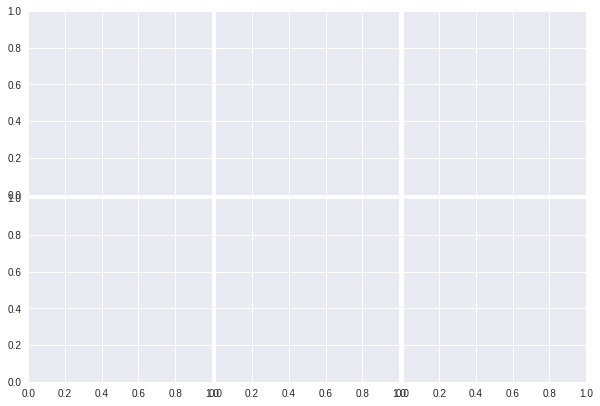

In [47]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
fig = plt.figure(1, figsize=(10, 10))
grid = ImageGrid(fig, 111, nrows_ncols=(2, 3), axes_pad=0.05)
ax = grid[0]
imshow(ax,im_to_see_1)
ax = grid[1]
imshow(ax,im_to_see_2)
ax = grid[3]
imshow(ax,x)
ax = grid[2]
imshow(ax,inp)
ax = grid[4]
imshow(ax,im_to_see_3)

In [0]:
class MuraImageDataset(Dataset):
    """Mura dataset."""
    def __init__(self, df, root_dir, transform=None):
        """
        Args:
            df (dataframe): Path to the image file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    def __len__(self):
        return len(self.df)
    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir,
                                self.df.iloc[idx, 0])
        ###-- Try refix at the centre -- ##
        #desired_size = 512
        #im = cv2.imread(img_name)
        #old_size = im.shape[:2] # old_size is in (height, width) format

        #ratio = float(desired_size)/max(old_size)
        #new_size = tuple([int(x*ratio) for x in old_size])

        # new_size should be in (width, height) format

        #im = cv2.resize(im, (new_size[1], new_size[0]))

        #delta_w = desired_size - new_size[1]
        #delta_h = desired_size - new_size[0]
        #top, bottom = delta_h//2, delta_h-(delta_h//2)
        #left, right = delta_w//2, delta_w-(delta_w//2)

        #color = [0, 0, 0]
        #image = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        #    value=color)
        #image = image[:,:,0]
        # create a CLAHE object (Arguments are optional).
        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #image = clahe.apply(image)
        #image = np.stack((image,)*3, -1)
        
        ###-- Refix at the centre Ends -- ##
        
        #print(img_name)
        #image = pil_loader(img_name)
        ### -- Try Clahe Transformation -- ##
        img = cv2.imread(img_name,0)
        #create a CLAHE object (Arguments are optional).
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        img = clahe.apply(img)
        image = np.stack((img,)*3, -1)
        ### -- Clahe Transformation Ends -- ##
        
        labels = self.df.iloc[idx, 2]
        labels = labels.astype('float')
        if self.transform:
            image = self.transform(image)
        return [image, labels]

In [0]:
transformed_train_dataset = MuraImageDataset(df=train_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

transformed_valid_dataset = MuraImageDataset(df=valid_path_df,
                                    root_dir='/content',
                                    transform=transforms.Compose([
                                               transforms.ToPILImage(),
                                               transforms.RandomRotation(10),
                                               #transforms.Resize(224),
                                               transforms.CenterCrop(224),
                                               transforms.RandomHorizontalFlip(),
                                               transforms.ToTensor(),
                                               transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                               
                                           ]))

In [0]:
transformed_train_dl = DataLoader(transformed_train_dataset,batch_size=8,shuffle=True)
transformed_valid_dl = DataLoader(transformed_valid_dataset,batch_size=8,shuffle=True)

In [0]:
from mpl_toolkits.axes_grid1 import AxesGrid, ImageGrid
#@title Default title text
## imshow works when we have transformed the image using some transformation
def imshow(axis, inp):
    """Denormalize and show"""
    inp = inp.numpy().transpose((1, 2, 0)) ## This line of code corrects the dimension issue that occurs during transformation 
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    axis.imshow(inp)

torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(0., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)
torch.Size([8, 3, 224, 224])
tensor(1., dtype=torch.float64)


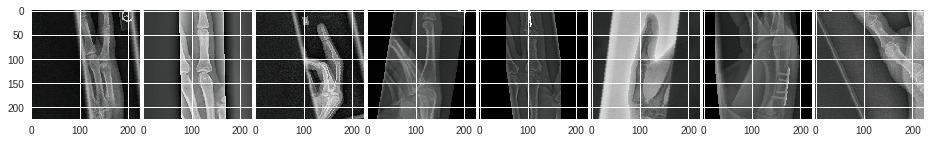

In [9]:
imgview, label = next(iter(transformed_valid_dl))
#print(img, label.size())
fig = plt.figure(1, figsize=(16, 8))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 8), axes_pad=0.05)  
for i in range(imgview.size()[0]):
  #print(img)
  ax = grid[i]
  print(imgview.shape)
  imshow(ax,imgview[i])
  print(label[i])

In [10]:
def get_count(layer_name,model_name):
  ct  = 0 
  layer_count ={}
  for name, child in model_name.named_children():
      for name2, params in child.named_parameters():
        layer_count[name2] = ct
        ct +=1
  return layer_count[layer_name]

def freeze_till(layer_name,model_name):
  ct  = 0 
  count = get_count(layer_name,model_name)
  
  for name, child in model_name.named_children():
    for name2, params in child.named_parameters():
      
      if ct > count :
          
            params.requires_grad = True
      else :
            params.requires_grad = False
      ct +=1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dataloaders = {"train": transformed_train_dl, "val": transformed_valid_dl}
dataset_sizes = {"train": len(transformed_train_dataset),"val":len(transformed_valid_dataset)}
print(dataset_sizes)

## This function just evaluate the loss / optimize  and returns model and the weight of the epoch which has highest accuracy
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        # Each epoch has a training and validation phase
        # In train phase they are settting 2 variable in model class - train() and schedular  = step()
        # In Validation phase setting the model class - eval()
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode
            running_loss = 0.0
            running_corrects = 0
            # Iterate over data.# phase - train or validation
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                labels = labels.type(torch.cuda.LongTensor)
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    
                    #print(outputs.shape)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                #print(phase,preds,labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            #print(preds[1:10],labels.data[1:10])
            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        #print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

{'train': 5106, 'val': 461}


In [69]:
# Load Pretrained model

#model_ft = models.resnet18(pretrained=True)
model_ft = models.densenet169(pretrained=True)

# Freeze specific layers of the model

freeze_till('transition2.conv.weight',model_ft)

# num_ftrs = model_ft.fc.in_features # fc for resnet
num_ftrs = model_ft.classifier.in_features
model_ft.classifier = nn.Linear(num_ftrs, 2)
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss(weight = torch.tensor([1, 1.05]).type(torch.cuda.FloatTensor))

/usr/local/lib/python3.6/dist-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [11]:
model_res = models.resnet18(pretrained=True)
num_ftrs = model_res.fc.in_features # fc for resnet
model_res.in_features = nn.Linear(num_ftrs, 2)
model_res = model_res.to(device)
criterion = nn.CrossEntropyLoss(weight = torch.tensor([1, 1.05]).type(torch.cuda.FloatTensor))

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /content/.torch/models/resnet18-5c106cde.pth
14.0%

100.0%


In [0]:
learning_rates = [1e-4, 1e-3, 1e-2]
for lr in learning_rates:
    #optimizer_ft = optim.SGD(model_ft.classifier.parameters(),lr, momentum=0.9)
    optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=3)

In [0]:
optimizer_ft = optim.Adam(list(filter(lambda p: p.requires_grad, model_ft.parameters())), lr = 1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=5, gamma=0.1)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 0.5598 Acc: 0.7170
val Loss: 0.5356 Acc: 0.7549
Epoch 1/14
----------
train Loss: 0.4844 Acc: 0.7705
val Loss: 0.4986 Acc: 0.7679
Epoch 2/14
----------


In [62]:
summary(model_ft,224)

TypeError: ignored

In [0]:
def summary(input_size, model):
        def register_hook(module):
            def hook(module, input, output):
                class_name = str(module.__class__).split('.')[-1].split("'")[0]
                module_idx = len(summary)

                m_key = '%s-%i' % (class_name, module_idx+1)
                summary[m_key] = OrderedDict()
                summary[m_key]['input_shape'] = list(input[0].size())
                summary[m_key]['input_shape'][0] = -1
                summary[m_key]['output_shape'] = list(output.size())
                summary[m_key]['output_shape'][0] = -1

                params = 0
                if hasattr(module, 'weight'):
                    params += th.prod(th.LongTensor(list(module.weight.size())))
                    if module.weight.requires_grad:
                        summary[m_key]['trainable'] = True
                    else:
                        summary[m_key]['trainable'] = False
                if hasattr(module, 'bias'):
                    params +=  th.prod(th.LongTensor(list(module.bias.size())))
                summary[m_key]['nb_params'] = params
                
            if not isinstance(module, nn.Sequential) and \
               not isinstance(module, nn.ModuleList) and \
               not (module == model):
                hooks.append(module.register_forward_hook(hook))
        
        # check if there are multiple inputs to the network
        if isinstance(input_size[0], (list, tuple)):
            x = [Variable(th.rand(1,*in_size)) for in_size in input_size]
        else:
            x = Variable(th.rand(1,*input_size))

        # create properties
        summary = OrderedDict()
        hooks = []
        # register hook
        model.apply(register_hook)
        # make a forward pass
        model(x)
        # remove these hooks
        for h in hooks:
            h.remove()

        return summary

### GitHub

You can save a copy of your Colab notebook to Github by using File > Save a copy to GitHub…

You can load any .ipynb on GitHub by just adding the path to colab.research.google.com/github/ . For example, [colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb](https://colab.research.google.com/github/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) will load [this .ipynb](https://github.com/tensorflow/models/blob/master/samples/core/get_started/_index.ipynb) on GitHub.



### Visualization

Colaboratory includes widely used libraries like [matplotlib](https://matplotlib.org/), simplifying visualization.

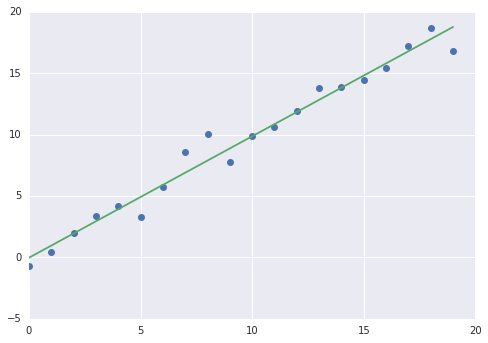

In [0]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
_ = plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-')

Want to use a new library?  `pip install` it at the top of the notebook. Then that library can be used anywhere else in the notebook. For recipes to import commonly used libraries, refer to the [importing libraries example notebook](/notebooks/snippets/importing_libraries.ipynb).

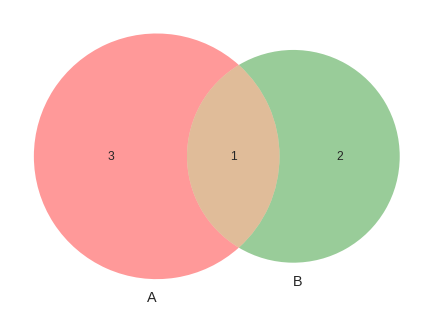

In [0]:
!pip install -q matplotlib-venn

from matplotlib_venn import venn2
_ = venn2(subsets = (3, 2, 1))

### Forms

Forms can be used to parameterize code. See the [forms example notebook](/notebooks/forms.ipynb) for more details.

In [0]:
#@title Examples

text = 'value' #@param 
date_input = '2018-03-22' #@param {type:"date"}
number_slider = 0 #@param {type:"slider", min:-1, max:1, step:0.1}
dropdown = '1st option' #@param ["1st option", "2nd option", "3rd option"]


### Local runtime support

Colab  supports connecting to a Jupyter runtime on your local machine. For more information, see our [documentation](https://research.google.com/colaboratory/local-runtimes.html).